# 0 Utils

In [378]:
import os
import numpy as np
import seaborn as sb
%matplotlib inline
sb.set()
import matplotlib.pyplot as plt
import pandas as pd
import shap


In [379]:
N_JOBS = 4 # -1 ocupa todo los cores
RANDOM_STATE = 42 # para que sea reproducible

## Experiment Setting 

In [380]:
import time
start_time = time.time()


In [381]:
# dataset, base nro 2
dataset_nro = 8
experiment_nro = 1
# 'All Proyects', 'Altos del Valle', 'Edificio Urban 1470','San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge'
proyecto_select = 'San Andres Del Valle' #cambiable

# base, base_profesion, base_minusisprofesion, base_medini_isrec
use_predictors = 'no_is_time_price' #cambiable
# experimento 2 y 4 va con True
no_nulls = False #cambiable
sesgo = False #cambiable

In [382]:
predictors_set = dict()

no_is_time_price = [
    'is_recontacto', 'is_remoto', 'is_descuento', 'valid_rut',
    'loc_comuna', 'loc_provincia', 'loc_region', 'sexo', 'tipo_cliente',
    'mean_cot_bod',
    'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
    'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
    'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
    'precio_cotizacion_median', 'precio_cotizacion_std', 
    'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
    'tiempo_cotizacion_std',   
    'Altos del Valle',
    'Edificio Urban 1470', 
#     'San Andres Del Valle', 
    'Edificio Mil610',
       'Edificio Junge']
predictors_set ['no_is_time_price'] = no_is_time_price

no_is =[
        'actividad', 
        'loc_comuna', 'loc_provincia', 'loc_region', 'is_descuento', 'is_presencial',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'is_remoto',
       'nro_cot_bod', 'nro_cot_depto', 'valid_rut', 'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos','is_recontacto',
       'sexo', 'tipo_cliente', 'medio_inicial',  
        'Altos del Valle', 
        'Edificio Urban 1470',
#        'San Andres Del Valle', 
        'Edificio Mil610', 
        'Edificio Junge'
       ]

predictors_set ['no_is'] = no_is

no_is_minus_actividad =[
#         'actividad', 
        'loc_comuna', 'loc_provincia', 'loc_region', 'is_descuento', 'is_presencial',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'is_remoto',
       'nro_cot_bod', 'nro_cot_depto', 'valid_rut', 'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos','is_recontacto',
       'sexo', 'tipo_cliente', 'medio_inicial',  
        'Altos del Valle', 
        'Edificio Urban 1470',
#        'San Andres Del Valle', 
        'Edificio Mil610', 
        'Edificio Junge'
       ]
predictors_set ['no_is_minus_actividad'] = no_is_minus_actividad


base = ['is_apellido1', 'is_appelido2', 'is_celular',
       'is_direccion', 'is_fnac', 'is_nombre', 'is_nombrecompleto',
       'is_nrofam', 'is_profesion', 'is_telefono',
       'loc_comuna', 'loc_provincia', 'loc_region',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu',
       'nro_cot_bod', 'nro_cot_depto',
       'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos',
       'sexo', 'tipo_cliente', 
        'Altos del Valle', 
#         'Edificio Urban 1470',
       'San Andres Del Valle', 
        'Edificio Mil610', 
        'Edificio Junge']

print(len(base))
predictors_set ['base'] = base

base_profesion = base[0:]
base_profesion.append('profesion')
print(len(base_profesion))
predictors_set ['base_profesion'] = base_profesion

base_minusisprofesion = base_profesion[0:]
base_minusisprofesion.remove('is_profesion')
print(len(base_minusisprofesion))
predictors_set ['base_minusisprofesion'] = base_minusisprofesion

base_medini_isrec = base_profesion[0:]
base_medini_isrec.append('medio_inicial')
base_medini_isrec.append('is_recontacto')
print(len(base_medini_isrec))
predictors_set ['base_medini_isrec'] = base_medini_isrec


28
29
28
31


# 1 Load Dataset

In [383]:
# nombre experimento
exp_name = "{} {}".format(proyecto_select, use_predictors)
# eleccion dataset
dataset = 'personas_cotizacion{}.csv'.format(dataset_nro)

# DS_NAME = dataset.split('.')[0]
DS_NAME = exp_name

directory = '..\\results\\model_results_dataset{}'.format(dataset_nro)
import os
if not os.path.exists(directory):
    os.makedirs(directory)

folder = '..\\results\\model_results_dataset{}\\{}'.format(dataset_nro, DS_NAME)

if not os.path.exists(folder):
    os.mkdir(folder)


personas = pd.read_csv('..\\..\\Datos\\experiments\\{}'.format(dataset), encoding = "ISO-8859-1")
personas_view = pd.read_csv('..\\..\\Datos\\experiments\\{}'.format(dataset), encoding = "ISO-8859-1")
readme = dict()
readme['experiment_name'] = DS_NAME
readme['experiment_dataset'] = dataset

print(personas.shape)
readme['personas_shape'] = personas.shape
# personas.head(2)

print(personas.columns)
readme['personas_columns'] = personas.columns.tolist()

(6155, 47)
Index(['Unnamed: 0', 'actividad', 'compra', 'is_apellido1', 'is_apellido2',
       'is_celular', 'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
       'precio_cotizacion_median', 'precio_cotizacion_std', 'rut', 'sexo',
       'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
       'tiempo_cotizacion_std', 'tipo_cliente', 'valid_rut', 'Altos del Valle',
       'Edificio Urban 1470', 'San Andres Del Valle', 'Edificio Mil610',
       'Edificio Junge'],
      dtype='object')


In [384]:
# personas.info()

In [385]:
personas['loc_comuna'] = personas['loc_comuna'].astype('category')
personas['loc_provincia'] = personas['loc_provincia'].astype('category')
personas['loc_region'] = personas['loc_region'].astype('category')
personas['tipo_cliente'] = personas['tipo_cliente'].astype('category')
personas['sexo'] = personas['sexo'].astype('category')
# personas.profesion.fillna('sin informacion', inplace=True)
# personas['profesion'] = personas['profesion'].astype('category')
personas['medio_inicial'] = personas['medio_inicial'].astype('category')

In [386]:
# personas.info()

In [387]:
# personas['negocio'] = ['negocio' if x == True else 'no negocio' for x in personas.negocio]
# personas.negocio.unique()

In [388]:
# tab_info=pd.DataFrame(personas.dtypes).T.rename(index={0:'column type'})
# tab_info=tab_info.append(pd.DataFrame(personas.isnull().sum()).T.rename(index={0:'null values (nb)'}))
# tab_info=tab_info.append(pd.DataFrame(personas.isnull().sum()/personas.shape[0]*100).T.rename(index={0:'null values (%)'}))
# display(tab_info)

In [389]:
# personas.hist(figsize=(18,16))

In [390]:
# Ajustes especificos experimento
# Para E5D5, E6D5 #########################################
if proyecto_select != 'All Proyects':
    mask = (personas[proyecto_select] > 0)
    personas = personas[mask]
    print(personas[mask].shape)
    personas[mask]
###########################################################

predictors = predictors_set[use_predictors]

# print(personas[personas['profesion']=='sin informacion'].shape)
# print(personas.profesion.nunique())
# print(personas.is_profesion.unique())

# En que experimento use esto? E8D6 y E28D6
# Se usa en los experimentos de data set limpio para evaluar con las personas que si entregaron la profesion
# personas.replace(['sin informacion'], np.nan, inplace=True)
# personas.dropna(inplace=True)
if no_nulls:
    personas.replace(['sin informacion'], np.nan, inplace=True)
    personas.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(3799, 47)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [391]:
print(predictors)
# Ready Data Set
p_negocio = personas.compra # Target
p_negocio = []
# personas = personas.drop(drop_columns, axis=1) # Predictors
personas = personas[predictors]

print(p_negocio.shape)
print(personas.shape)
readme['personas_after_drop_columns'] = personas.columns

print(personas.shape)
readme['personas_predictors_shape'] = personas.shape
readme['personas_predictors'] = personas.columns


personas = pd.get_dummies(personas)
readme['personas_dummies_shape'] = personas.shape

# personas.describe()

['is_recontacto', 'is_remoto', 'is_descuento', 'valid_rut', 'loc_comuna', 'loc_provincia', 'loc_region', 'sexo', 'tipo_cliente', 'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media', 'precio_cotizacion_median', 'precio_cotizacion_std', 'tiempo_cotizacion_media', 'tiempo_cotizacion_median', 'tiempo_cotizacion_std', 'Altos del Valle', 'Edificio Urban 1470', 'Edificio Mil610', 'Edificio Junge']
(3799,)
(3799, 29)
(3799, 29)


## Correlacion 

In [392]:
# from scipy.stats.stats import pearsonr, spearmanr, kendalltau
# corr_p = personas.corr(method='pearson')

# import seaborn as sns
# f = plt.figure(figsize=(40,20))
# g = sns.heatmap(corr_p, annot=True).get_figure()
# g.savefig('..\\img\\time_series_corr.png')

In [393]:
# from sklearn.feature_selection import VarianceThreshold
# vt = VarianceThreshold()
# personas_vt = vt.fit_transform(personas)

In [394]:
# print(personas_vt.shape)
# print(vt.variances_)

# 3 Supervised Learning: Classification

## 3.1 Libraries

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

## 3.2 Check the Dataset

In [396]:
print("Tamaño Total: ", personas.shape)
print("Personas que hicieron Negocio: ", p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ", p_negocio[p_negocio == False].shape)
readme['personas_negocio'] = p_negocio[p_negocio == True].shape
readme['personas_nonegocio'] = p_negocio[p_negocio == False].shape

Tamaño Total:  (3799, 55)
Personas que hicieron Negocio:  (235,)
Personas que no Hicieorn Negocio:  (3564,)


In [397]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# transformer = SelectKBest(score_func=chi2,k=10)
# Xt_chi2 = transformer.fit_transform(X,y)
# print(Xt_chi2.shape)
# print(transformer.scores_)

## 3.3 Train & Test

In [398]:
X = personas
y = p_negocio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
readme['x_train_shape'] = X_train.shape
readme['y_train_shape'] = y_train.shape
readme['x_test_shape'] = X_test.shape
readme['y_test_shape'] = y_test.shape

(2659, 55) (1140, 55) (2659,) (1140,)


## 3.4 Help Functions

In [399]:
readme['model'] = dict()

In [400]:
roc_curves_to_plot= dict()

In [401]:
roc_curves_to_plot[DS_NAME]= dict()

In [402]:
import scikitplot as skplt

def classifier_insights(y_test, clf_probas, MODEL):
    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_cumulative_gain(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_cum_gain.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()


    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_lift_curve(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_lift.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()

    fig = plt.figure()
    ax = plt.subplot(skplt.estimators.plot_feature_importances(
        best_brf, feature_names=personas.columns, x_tick_rotation=90, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_f_importance.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()



    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_precision_recall(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}\\{}\\{}_precition_recall.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()

    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_ks_statistic(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_ks_sta.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()

In [403]:
import json
def save_readme():    
    exDict = {'readme': readme}
    with open('..\\results\\model_results_dataset{}\\{}\\readme_{}.txt'.format(dataset_nro, DS_NAME, DS_NAME), 'w') as file:
        file.write(str(exDict))

def plot_all_auc_values():
        
    d = dict()
    for key in roc_curves_to_plot[DS_NAME]:
        d[key] = roc_curves_to_plot[DS_NAME][key]['auc']
    
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    
    x_model = [x[0] for x in s]
    x_value = [x[1] for x in s]
    
    x = np.arange(len(roc_curves_to_plot[DS_NAME].keys()))
    
    f = plt.figure(figsize=(12,8))
    plt.title('{} AUC Models'.format(DS_NAME))
    plt.xlabel('Models')
    plt.ylabel('AUC')
    plt.bar(x, x_value)
    plt.xticks(x, x_model)
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\auc_models.png'.format(dataset_nro, DS_NAME,DS_NAME), dpi=300)
    plt.show()

def plot_all_roc_curves():
    
    f = plt.figure(figsize=(12,8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    for key in roc_curves_to_plot[DS_NAME]:
        plt.plot(roc_curves_to_plot[DS_NAME][key]['fpr'], roc_curves_to_plot[DS_NAME][key]['tpr']) #fpr and tpr
    
    legends = ['random choice']
    legends.extend(roc_curves_to_plot[DS_NAME].keys())
    plt.legend(legends)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Models ROC Curve'.format(DS_NAME))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\roc_curve_all.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

# Import necessary modules
def roc_curve_plot(model, X_test, y_test):
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)
    
    roc_curves_to_plot[DS_NAME][MODEL] = dict()
    roc_curves_to_plot[DS_NAME][MODEL]['fpr'] = fpr
    roc_curves_to_plot[DS_NAME][MODEL]['tpr'] = tpr
    roc_curves_to_plot[DS_NAME][MODEL]['auc'] = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} {} ROC Curve'.format(DS_NAME, MODEL))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_roc_curve.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

def plot_confusion_matrix(model,y, y_pred):
    conf_ma = confusion_matrix(y, y_pred)
    clas_report = classification_report(y, y_pred)
    
    print("Confusion Matrix: \n", conf_ma)
    readme['model'][MODEL]['conf_matrix'] = conf_ma
    
    print("Clasification Reports:\n", clas_report)
    readme['model'][MODEL]['cla_report'] = clas_report
    
    plt.figure(figsize=(5,5))
    
    sb.heatmap(conf_ma, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    title_plt = "{} {} Conf. Matrix".format(DS_NAME, MODEL)
    plt.title(title_plt, size=10);
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_confusion_matrix.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

def plot_importance_graph(model):
    features = personas.columns
    
    feature_importance = model.best_estimator_.feature_importances_ 
    fig = plt.figure(figsize=(20, 18))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(feature_importance, columns=["importance"])
    df_f["labels"] = features
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(5))

    index = np.arange(len(feature_importance[:20]))
    bar_width = 0.5
    rects = plt.barh(index[:20] , df_f["importance"][:20], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.title("{} {} Feature Importance".format(DS_NAME, MODEL))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_importance.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

def grid_results(grid, plot_roc_curve=True):
    
    best_model = grid.best_estimator_
    
    try:
        best_score = grid.best_score_
        readme['model'][MODEL]['best_score'] = best_score
        print("Besto Model Best score is {}".format(grid.best_score_))
    except Exception as e:
        print("Error: " + str(e))
    
    readme['model'][MODEL]['name'] = MODEL
    readme['model'][MODEL]['best_estimator'] = best_model
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    # Confusion Matrix
    plot_confusion_matrix(best_model, y_test, y_pred)
    
    #Update Exec Time
    readme['time_exec'] = time.time() - start_time
    
    #Update README
    save_readme()
    
    #ROC Curve
    if plot_roc_curve:
        roc_curve_plot(best_model, X_test, y_test)

## 3.5 Models

# LogisticRegression Grid

Tuned Logistic Regression Parameters: {'C': 1e-05, 'penalty': 'l1'}
Best Estimator:  LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Besto Model Best score is 0.9381416162147934


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix: 
 [[1085    0]
 [  55    0]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.95      1.00      0.98      1085
       True       0.00      0.00      0.00        55

avg / total       0.91      0.95      0.93      1140



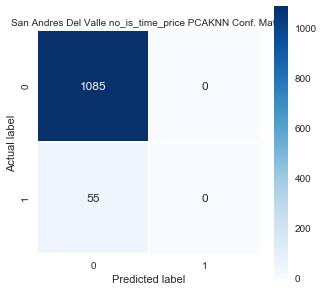

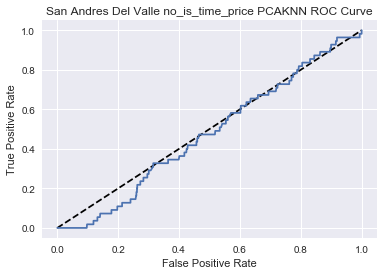

ROC AUC Score: 0.47387515710096356


In [159]:
X = MinMaxScaler().fit_transform(X)

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
C = np.logspace(0, 4, 10)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(class_weight=None)
# logreg = LogisticRegression()

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Instantiate the GridSearchCV object: logreg_cv
grid_logreg = GridSearchCV(logreg, param_grid, cv=kf, n_jobs=N_JOBS)
grid_logreg.fit(X, y)

# # Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_logreg.best_params_))
print('Best Estimator: ', grid_logreg.best_estimator_)
# print("Best score is {}".format(logreg_cv.best_score_))
# Fit it to the data
grid_results(grid_logreg)
# # 
y_pred_prob = grid_logreg.predict_proba(X_test)[:,1]

print("ROC AUC Score:" ,roc_auc_score(y_test,y_pred_prob))

## LOGISTIC REGRESSION Unbalanced

(2659, 55) (1140, 55) (2659,) (1140,)
0.9517543859649122


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix: 
 [[1085    0]
 [  55    0]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.95      1.00      0.98      1085
       True       0.00      0.00      0.00        55

avg / total       0.91      0.95      0.93      1140



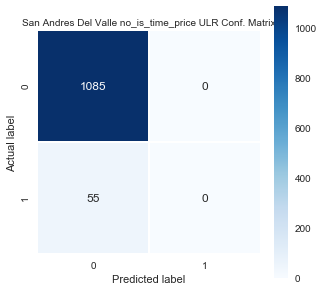

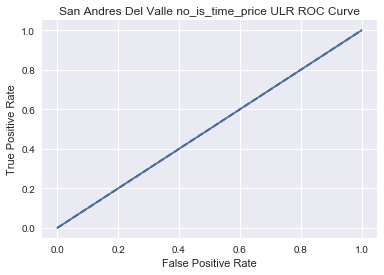

In [160]:
MODEL = 'ULR'
readme['model'][MODEL] = dict()
to_profit_curve[MODEL] = dict()

# Balanced Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

# model = LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l1', random_state=RANDOM_STATE,
#           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model = grid_logreg.best_estimator_
model.class_weight= None

to_profit_curve[MODEL]['model'] = model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))
plot_confusion_matrix(model,  y_test, y_pred)

#ROC Curve
roc_curve_plot(model, X_test, y_test)

## LOGISTIC REGRESSION Balanced

(2659, 55) (1140, 55) (2659,) (1140,)
Model Score: 0.9517543859649122


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix: 
 [[1085    0]
 [  55    0]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.95      1.00      0.98      1085
       True       0.00      0.00      0.00        55

avg / total       0.91      0.95      0.93      1140



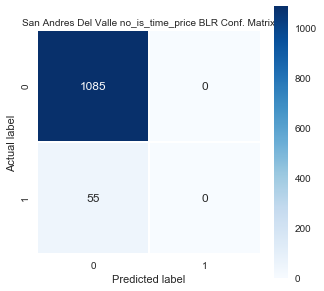

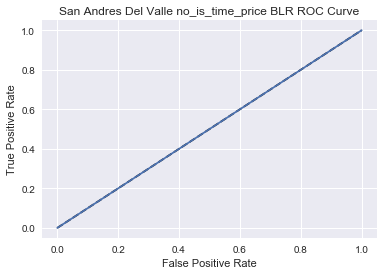

In [161]:
MODEL = 'BLR'
readme['model'][MODEL] = dict()
to_profit_curve[MODEL] = dict()

# Balanced Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# model = LogisticRegression(C=3.727593720314938, class_weight='balanced', dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=RANDOM_STATE,
#           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model = grid_logreg.best_estimator_
model.class_weight= 'balanced'

to_profit_curve[MODEL]['model'] = model

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Score:", model.score(X_test, y_test))
plot_confusion_matrix(model, y_test, y_pred)

#ROC Curve
roc_curve_plot(model, X_test, y_test)

# DecisionTree GRID

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 2}
Best score is 0.9397209792050539
Best estimator is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Besto Model Best score is 0.9397209792050539
Confusion Matrix: 
 [[1084    1]
 [  55    0]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.95      1.00      0.97      1085
       True       0.00      0.00      0.00        55

avg / total       0.91      0.95      0.93      1140



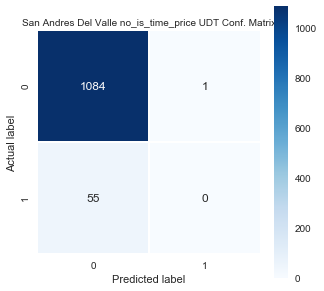

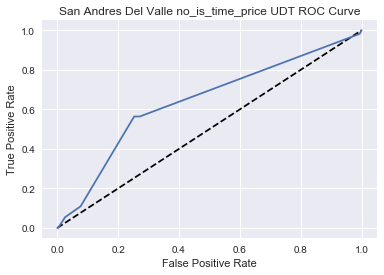

In [162]:
MODEL = 'UDT'
readme['model'][MODEL] = dict()
to_profit_curve[MODEL] = dict()
# Setup the parameters and distributions to sample from: param_dist

param_dist = {
    "max_depth": [3, 5, 10, 15, 20, None],
    "max_features": randint(1, 30),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

param_dist = {
    "max_depth": range(1,20),
    "max_features":range(1,30),
    "min_samples_leaf": range(1,10),
    "criterion": ["gini", "entropy"]
}

# Instantiate a Decision Tree classifier: tree
# tree = DecisionTreeClassifier(class_weight='balanced')
tree_clf = DecisionTreeClassifier()

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Instantiate the RandomizedSearchCV object: tree_cv
# tree_cv = RandomizedSearchCV(tree, param_dist, cv=kf)
grid_tree = GridSearchCV(tree_clf, param_dist, cv=kf, n_jobs=N_JOBS)

to_profit_curve[MODEL]['model'] = grid_tree
# Fit it to the data
grid_tree.fit(X,y)

# # Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(grid_tree.best_params_))
print("Best score is {}".format(grid_tree.best_score_))
print("Best estimator is {}".format(grid_tree.best_estimator_))

grid_results(grid_tree)

,importance,labels
2,0.398016,is_descuento
14,0.213438,precio_cotizacion_median
26,0.129490,loc_comuna_HualpÃ©n
18,0.076084,tiempo_cotizacion_std
45,0.054654,medio_inicial_INTERNET


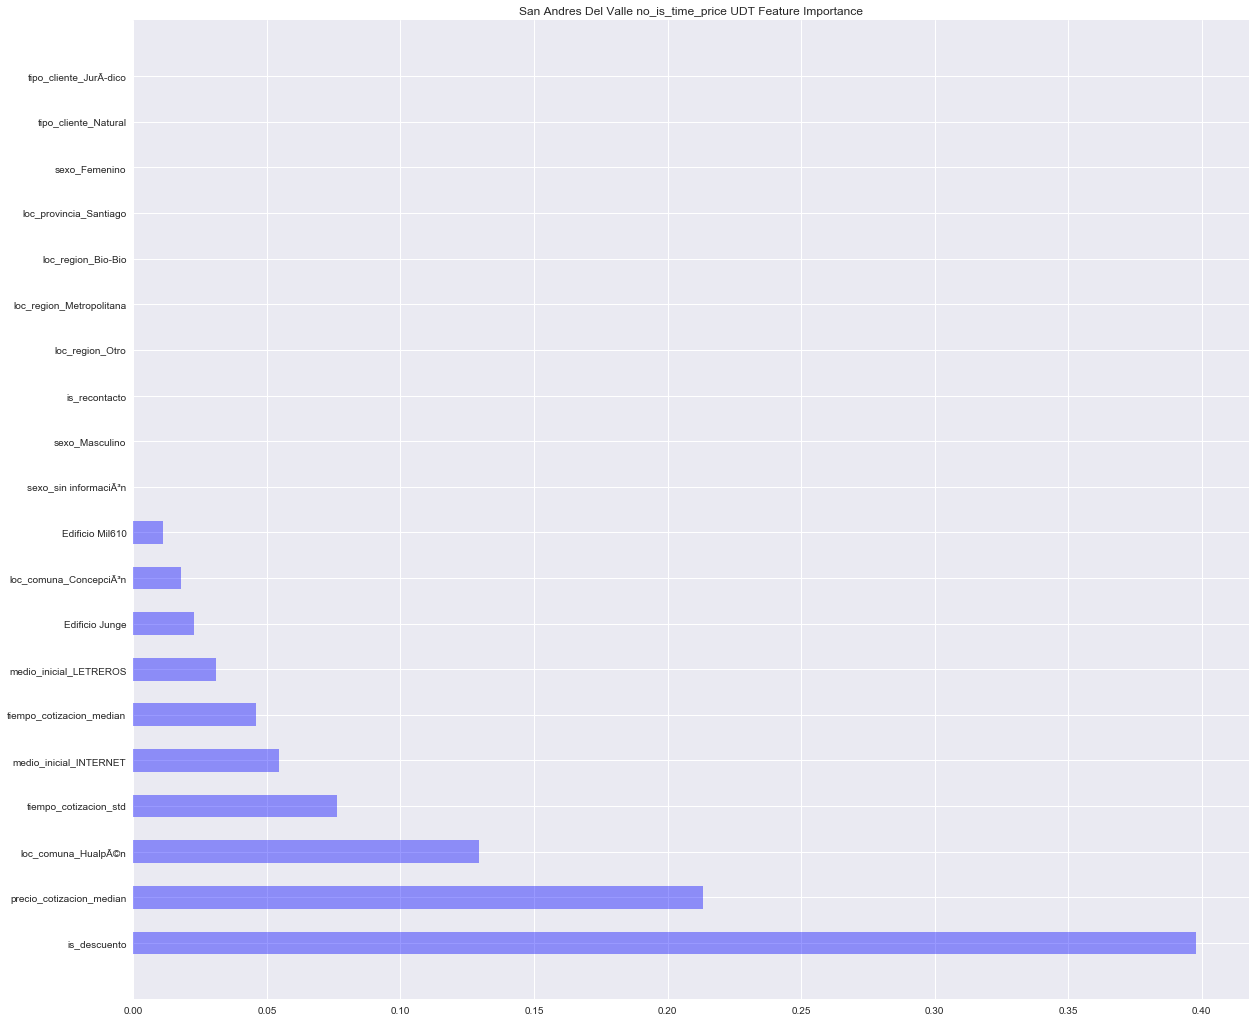

In [164]:
plot_importance_graph(grid_tree)

In [165]:
best_dt = grid_tree.best_estimator_

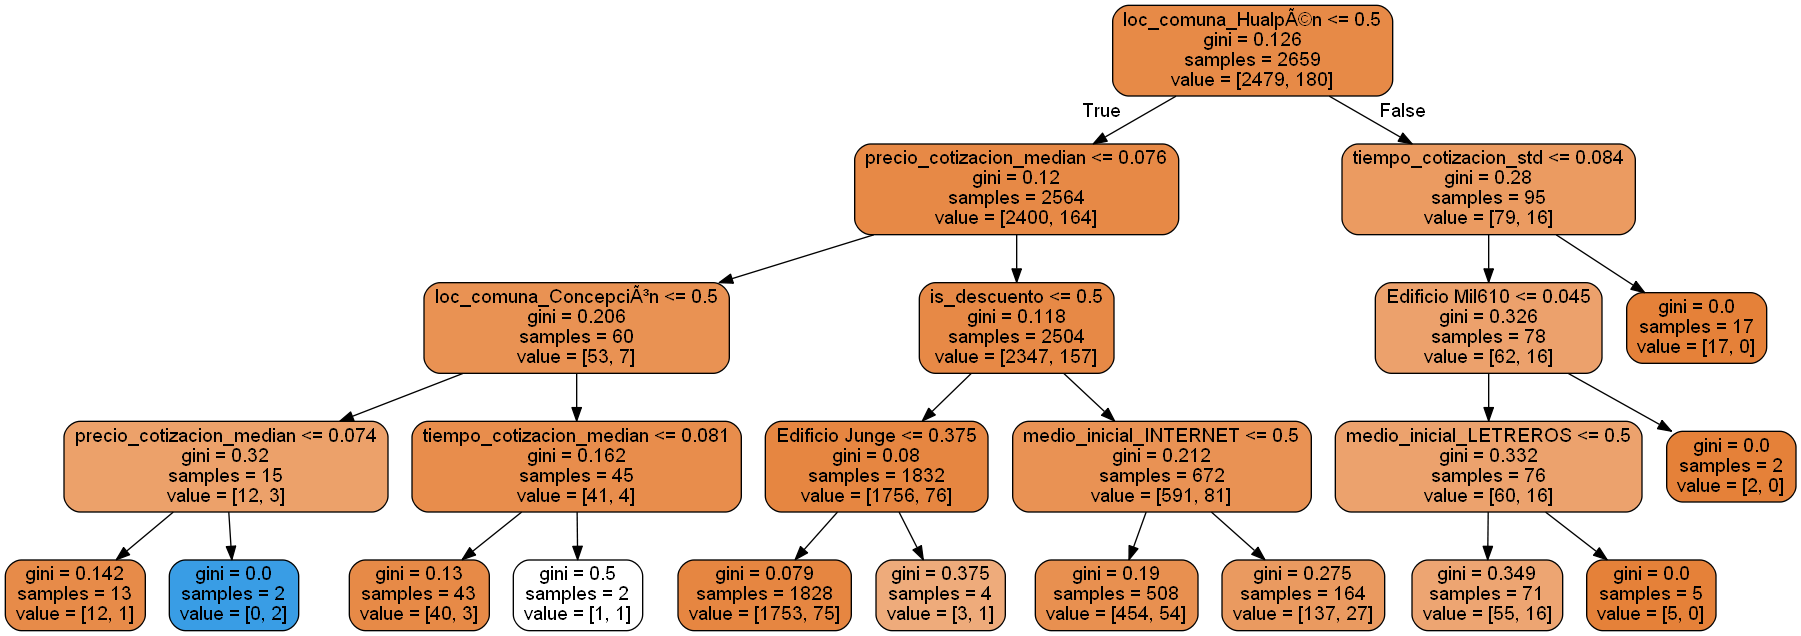

In [166]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os, sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

# visualize the decision tree
dot_data = StringIO()
export_graphviz(best_dt, out_file=dot_data, feature_names=personas.columns, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
conda_fix(graph)
# graph.write_pdf("booking_tree.pdf")
Image(graph.create_png())

In [167]:
graph.write_pdf("..//results/model_results_dataset{}/\\{}\\{}_decision_tree.pdf".format(dataset_nro, DS_NAME,MODEL))

True

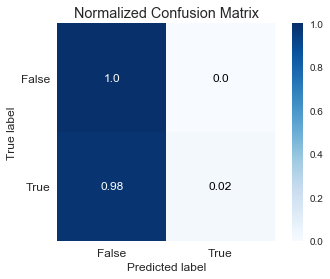

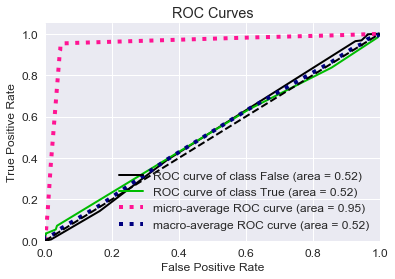

In [168]:
# bdt_clf = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
#             max_features=26, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=9, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=RANDOM_STATE,
#             splitter='best')

best_tree = grid_tree.best_estimator_

from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(best_tree, X, y)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)
plt.show()

best_tree.fit(X_train, y_train)
y_probas = best_tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()


# GRID Unbalanced RandomForest

Best estimator is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=18, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Tuned Decision Tree Parameters: {'min_samples_leaf': 5, 'max_features': 9, 'max_depth': 18, 'criterion': 'entropy'}
Best score is 0.9386680705448802
Besto Model Best score is 0.9386680705448802


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix: 
 [[1085    0]
 [  55    0]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.95      1.00      0.98      1085
       True       0.00      0.00      0.00        55

avg / total       0.91      0.95      0.93      1140



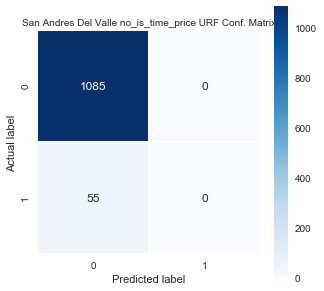

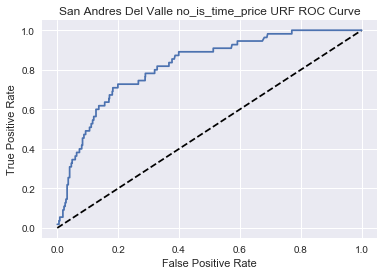

,importance,labels
9,0.229981,nro_cot_depto
13,0.101246,precio_cotizacion_media
0,0.086114,is_recontacto
14,0.082082,precio_cotizacion_median
15,0.071440,precio_cotizacion_std


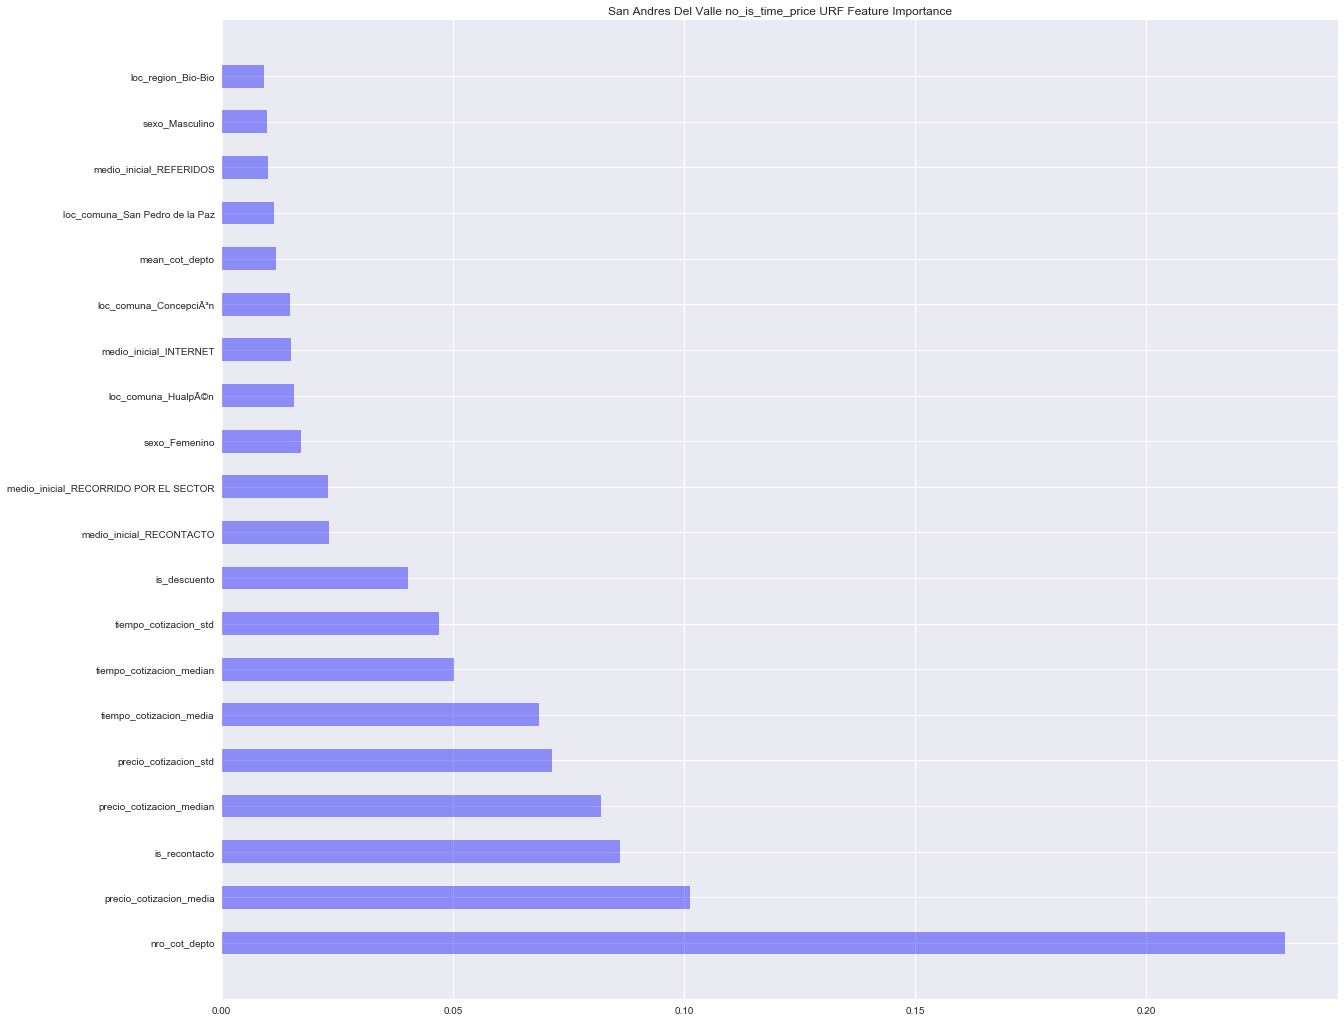

In [169]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {
    "max_depth": range(1,20),
    "max_features":range(1,30),
    "min_samples_leaf": range(1,10),
    "criterion": ["gini", "entropy"]
}

# Instantiate a Decision Tree classifier: tree
rf = RandomForestClassifier()

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Instantiate the RandomizedSearchCV object: tree_cv
grid_urf = RandomizedSearchCV(rf, param_dist, cv=kf, n_jobs=N_JOBS, n_iter=300, random_state=RANDOM_STATE)
# rf_cv = GridSearchCV(rf, param_grid, cv=kf, n_jobs=N_JOBS)

# Fit it to the data
grid_urf.fit(X, y)

# Predict
# y_pred = rf_cv.predict(X_test)

# Print the tuned parameters and score
print("Best estimator is {}".format(grid_urf.best_estimator_))
print("Tuned Decision Tree Parameters: {}".format(grid_urf.best_params_))
print("Best score is {}".format(grid_urf.best_score_))
# print("Best score is {}".format(grid_urf.best_estimator_.best_score_))

import pickle
s = pickle.dumps(grid_urf.best_estimator_)

from sklearn.externals import joblib
joblib.dump(grid_urf.best_estimator_, 'urf.joblib')

# clf = joblib.load('filename.joblib') Para cargar modelo
grid_results(grid_urf)
plot_importance_graph(grid_urf)

In [170]:
# X_train.to_excel('x_train.xlsx')
# y_train.to_excel('y_train.xlsx')
# X_test.to_excel('x_test.xlsx')
# y_test.to_excel('y_test.xlsx')

In [171]:
# probas = grid_urf.predict_proba(X_test)
# classifier_insights(y_test, probas, 'URF')

# Unbalanced RandomForest

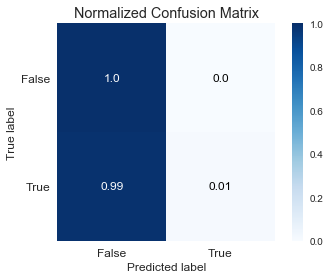

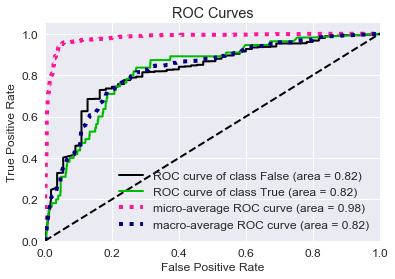

In [172]:
# bdt_clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
#             max_depth=20, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=4, min_samples_split=26,
#             min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
#             oob_score=False, random_state=RANDOM_STATE, verbose=0,
#             warm_start=False)

bdt_clf = grid_urf.best_estimator_

from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(bdt_clf, X, y)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)
plt.show()

bdt_clf.fit(X_train, y_train)
y_probas = bdt_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

# Balanced RandomForest

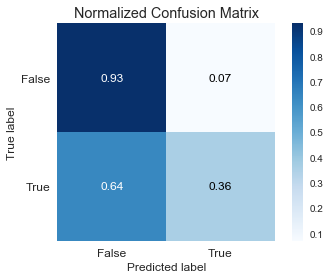

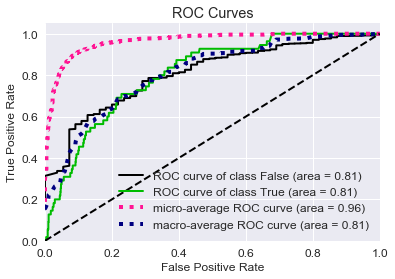

In [173]:
# bdt_clf = RandomForestClassifier(bootstrap=False, class_weight='balanced', criterion='gini',
#             max_depth=20, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=4, min_samples_split=26,
#             min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
#             oob_score=False, random_state=RANDOM_STATE, verbose=0,
#             warm_start=False)

bdt_clf.class_weight = 'balanced'

from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(bdt_clf, X, y)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)
plt.show()

bdt_clf.fit(X_train, y_train)
y_probas = bdt_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

## RandomForest Balanced

Best Params:  {'min_samples_leaf': 2, 'max_features': 29, 'max_depth': 16, 'criterion': 'entropy'}
Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=16, max_features=29,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Besto Model Best score is 0.9249802579626217
Confusion Matrix: 
 [[1062   23]
 [  48    7]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.96      0.98      0.97      1085
       True       0.23      0.13      0.16        55

avg / total       0.92      0.94      0.93      1140



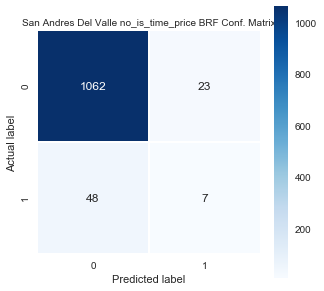

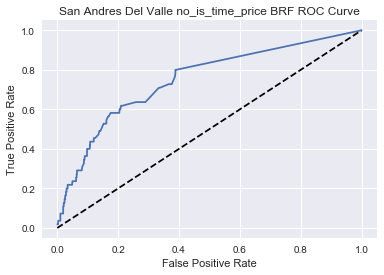

,importance,labels
9,0.249550,nro_cot_depto
13,0.115440,precio_cotizacion_media
14,0.097470,precio_cotizacion_median
0,0.074938,is_recontacto
17,0.061919,tiempo_cotizacion_median


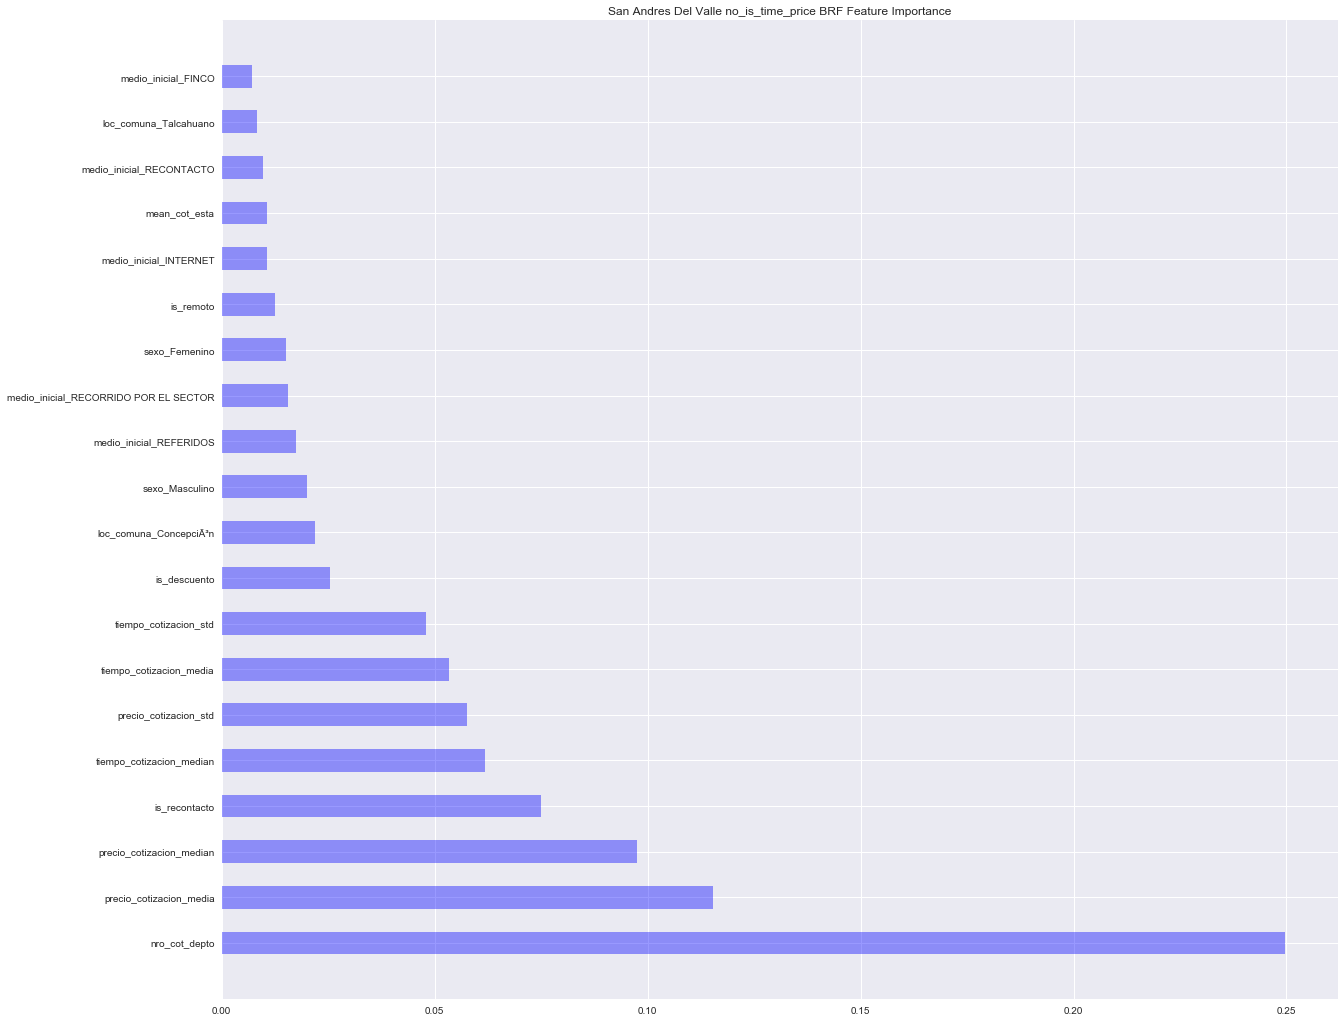

In [174]:
MODEL = 'BRF'
readme['model'][MODEL] = dict()
to_profit_curve[MODEL] = dict()

param_grid = {
    "max_depth": randint(1,30),
    "max_features":randint(1,40),
    "min_samples_leaf": randint(1,20),
    "criterion": ["gini", "entropy"],
    "min_samples_split": randint(2,20),
    "n_estimators":[20,30,40,50,60,70,80,90,100],
    "bootstrap": [True, False],
}

param_dist = {
    "max_depth": range(1,20),
    "max_features":range(1,30),
    "min_samples_leaf": range(1,10),
    "criterion": ["gini", "entropy"]
}

randomForest = RandomForestClassifier(class_weight='balanced')

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# RandomSearch
randomForest_cv = RandomizedSearchCV(randomForest, param_dist, cv=kf, n_jobs=N_JOBS)

to_profit_curve[MODEL]['model'] = randomForest_cv
# Grid Search
# randomForest_cv = GridSearchCV(randomForest, param_grid, cv=kf, n_jobs=-1)

# Train
randomForest_cv.fit(X, y)

print("Best Params: ", randomForest_cv.best_params_)
print('Best Estimator: ', randomForest_cv.best_estimator_)
grid_results(randomForest_cv)
plot_importance_graph(randomForest_cv)

Accuracy:  0.9377192982456141


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix: 
 [[1085    0]
 [  55    0]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.95      1.00      0.98      1085
       True       0.00      0.00      0.00        55

avg / total       0.91      0.95      0.93      1140



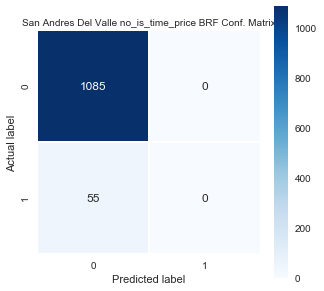

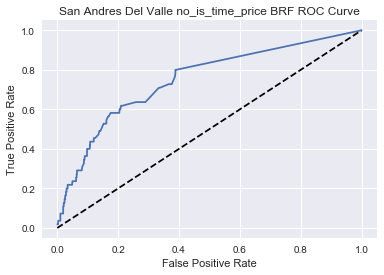

In [175]:
best_brf = randomForest_cv.best_estimator_
# Make predictions

# best_brf.fit(X_train, y_train)
score = best_brf.score(X_test, y_test)
print("Accuracy: ", score)

plot_confusion_matrix(best_brf, y_test, y_pred)

roc_curve_plot(best_brf, X_test, y_test)

In [176]:
brf_probs = best_brf.predict_proba(X_test)

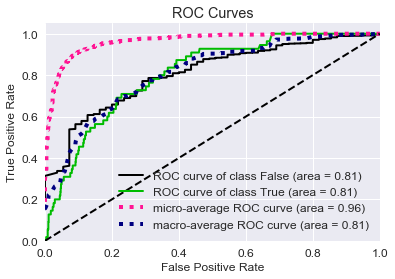

In [177]:
skplt.metrics.plot_roc(y_test, y_probas)

### 3.5.6 SVM

Besto Model Best score is 0.9381416162147934


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix: 
 [[1085    0]
 [  55    0]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.95      1.00      0.98      1085
       True       0.00      0.00      0.00        55

avg / total       0.91      0.95      0.93      1140



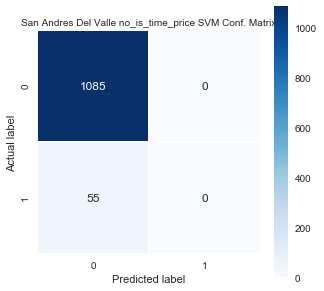

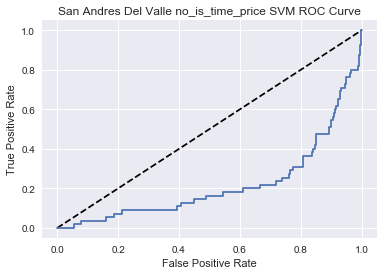

In [178]:
MODEL = 'SVM'
readme['model'][MODEL] = dict()

from sklearn import svm, grid_search

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

grid_svm = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid, cv=5, n_jobs=-1)

grid_svm.fit(X, y)

grid_results(grid_svm)

In [179]:
from numpy import loadtxt
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data

# model = xgboost.XGBClassifier()

In [185]:
# shap.force_plot(explainer.expected_value, shap_values, X)

In [186]:
# shap.dependence_plot("Feature 16", shap_values, X)

In [187]:
# shap.summary_plot(shap_values, X)

In [188]:
# shap.summary_plot(shap_values, X, plot_type="bar")

In [189]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# fit model no training data
xgb_clf = XGBClassifier()

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# xgb_grid = GridSearchCV(xgb_clf, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
xgb_grid = GridSearchCV(xgb_clf, param_grid, n_jobs=-1, cv=kfold, verbose=1)
xgb_grid.fit(X_train, y_train)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   38.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6, 8], 'n_estimators': [50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Besto Model Best score is 0.9323053779616397


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion Matrix: 
 [[1084    1]
 [  55    0]]
Clasification Reports:
              precision    recall  f1-score   support

      False       0.95      1.00      0.97      1085
       True       0.00      0.00      0.00        55

avg / total       0.91      0.95      0.93      1140



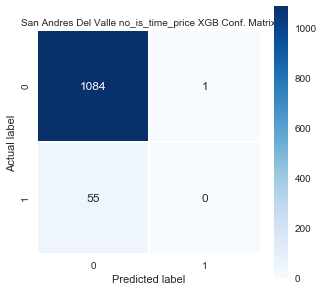

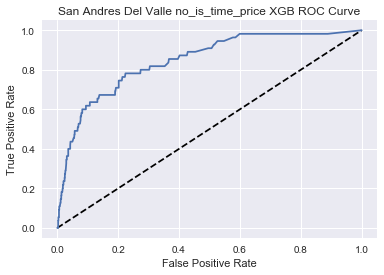

In [190]:
grid_results(xgb_grid)

In [ ]:
readme['model']['XGB']['best_score']

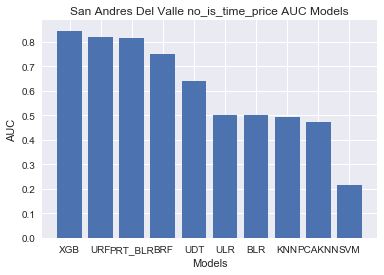

In [191]:
d = dict()
for key in roc_curves_to_plot[DS_NAME]:
    d[key] = roc_curves_to_plot[DS_NAME][key]['auc']
    
s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    
x_model = [x[0] for x in s]
x_value = [x[1] for x in s]
    
x = np.arange(len(roc_curves_to_plot[DS_NAME].keys()))
    
plt.title('{} AUC Models'.format(DS_NAME))
plt.xlabel('Models')
plt.ylabel('AUC')
plt.bar(x, x_value)
plt.xticks(x, x_model)
# plt.savefig('..\\results\\model_results\\{}\\auc_models.png'.format(DS_NAME,DS_NAME), dpi=300)
plt.show()

In [192]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# load data

model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=55, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.002, n=28, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.002, n=28, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.002, n=28, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.003, n=25, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.005, n=24, Accuracy: 95.35%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.007, n=23, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.007, n=23, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.007, n=23, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.007, n=23, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.012, n=19, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.017, n=18, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.018, n=17, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.020, n=16, Accuracy: 95.09%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.023, n=15, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.023, n=15, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.025, n=13, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.027, n=12, Accuracy: 95.44%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.027, n=12, Accuracy: 95.44%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.028, n=10, Accuracy: 95.18%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.047, n=9, Accuracy: 95.18%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.050, n=8, Accuracy: 95.18%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.050, n=8, Accuracy: 95.18%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.055, n=6, Accuracy: 95.00%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.066, n=5, Accuracy: 94.91%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.075, n=4, Accuracy: 95.09%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.086, n=3, Accuracy: 95.18%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.153, n=2, Accuracy: 95.26%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.159, n=1, Accuracy: 95.18%


In [ ]:
# plot feature importance using built-in function
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from matplotlib import pyplot
# # plot feature importance
# f = plt.figure(figsize=(15,12))
# plt.plot(plot_importance(model)
# plt.show()
# pyplot.show()

In [ ]:
# plot_confusion_matrix(xgb_grid, X_test, y_test, y_pred)

# roc_curve_plot(xgb_grid, X_test, y_test)

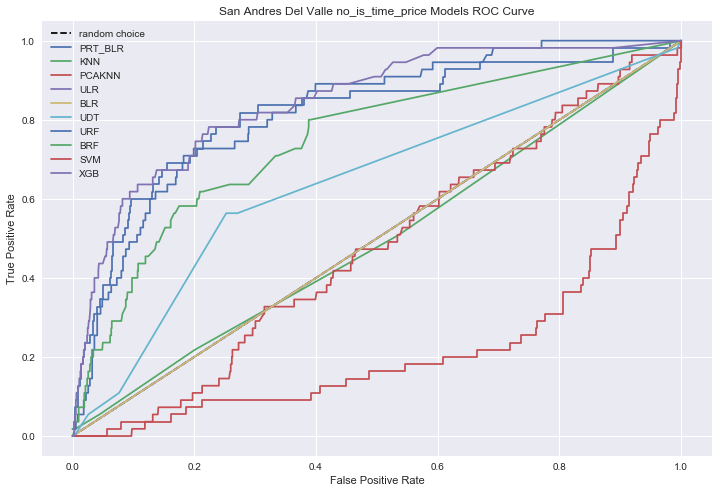

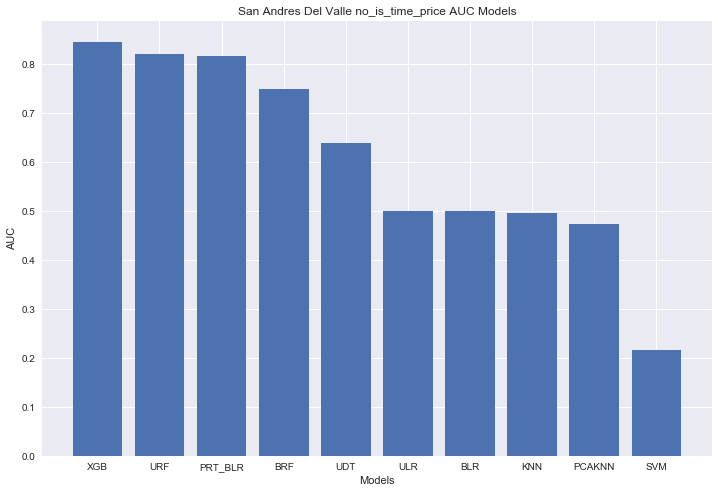

In [193]:
plot_all_roc_curves()
plot_all_auc_values()

In [194]:
roc_curves_to_plot.keys()

dict_keys(['San Andres Del Valle no_is_time_price'])

In [ ]:
# print(roc_curves_to_plot['Altos del Valle NN base']['BRF']['auc'])
# print(roc_curves_to_plot['Altos del Valle NN base_profesion']['BRF']['auc'])
# print(roc_curves_to_plot['Altos del Valle NN base_minusisprofesion']['BRF']['auc'])
# print(roc_curves_to_plot['Altos del Valle NN base_medini_isrec']['BLR']['auc'])

In [ ]:
#Cost assumptions
# '''Cost of FP: 1, cost of FN: 2, cost of TN: 0, cost of TP: -1'''
# cost_TP = 4; cost_FP = -5; cost_FN = 0; cost_TN = 0;
# cb_matrix = -1*np.array([[cost_TP, cost_FP],[cost_FN, cost_TN]])

In [ ]:
#Convert to standard confusion matrix
# def standard_confusion_matrix(y_true, y_predict):
#     TP = sum((y_true == 1) & (y_predict == 1))
#     TN = sum((y_true == 0) & (y_predict == 0))
#     FP = sum((y_true == 0) & (y_predict == 1))
#     FN = sum((y_true == 1) & (y_predict == 0))
    
#     return np.array([[TP,FP],[FN,TN]])

In [ ]:
# def profit_curve(cb, predict_probas, labels):
#     indices = np.argsort(predict_probas)
#     sorted_probs = predict_probas[indices]
#     sorted_labels = labels.values[indices]
#     profit_list = []
    
#     for sp, sl in zip(sorted_probs, sorted_labels):
#         predict_labels = sorted_probs > sp + .0001
#         conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
#         profit_list.append((cb * conf_mat).sum() / (len(labels)))
    
#     return profit_list, sorted_probs

In [ ]:
# Plot the profit curves
# def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
#     model.fit(X_train, y_train)
#     predict_probas = model.predict_proba(X_test)[:,1]
#     profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
#     max_index = np.argmax(profit_list)
#     max_threshold = sorted_probs[max_index]
#     max_profit = profit_list[max_index]
    
#     plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
#     plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

In [ ]:
# models = [LogisticRegression(), svm.SVC(probability=True), RandomForestClassifier()]

# fig = plt.figure(figsize=(10,8))
# # fig.set_facecolor('#F2F2F2')
# colors = ['r', 'g', 'b', 'm']
# for i, model in enumerate(models):
#     plot_profit_curve(model, model.__class__.__name__, cb_matrix,
#                       X_train, X_test, y_train, y_test, colors[i])

# plt.title("Profit Curves")
# plt.xlabel("Percentage of test instances (decreasing by score)")
# plt.ylabel("Profit")
# plt.legend(loc='best')
# plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
# plt.show()

In [ ]:
# models = []
# model_names = []
# for key, value in to_profit_curve.items():
#     models.append(value['model'])
#     model_names.append(key)
#     print(key, value['model'])

In [ ]:
# # models = [LogisticRegression(), svm.SVC(probability=True), RandomForestClassifier()]
# # names =

# fig = plt.figure(figsize=(10,8))
# # fig.set_facecolor('#F2F2F2')
# colors = ['r', 'g', 'b', 'm']
# for i, model in enumerate(models):
# #     plot_profit_curve(model, model.__class__.__name__, cb_matrix,
# #                       X_train, X_test, y_train, y_test, colors[i])
#     plot_profit_curve(model, model_names[i], cb_matrix,
#                       X_train, X_test, y_train, y_test, colors[i])



In [ ]:
# plt.title("Profit Curves")
# plt.xlabel("Percentage of test instances (decreasing by score)")
# plt.ylabel("Profit")
# plt.legend(loc='best')
# plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
# plt.show()